In [10]:
from astropy.io import fits
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
import os


In [2]:
os.chdir('/home/rfinn/research/Virgo/supersample')

In [4]:
%run ~/github/Virgo/programs/clean_kitchen_sink.py

In [5]:
!ls


clean_kitchen_sink.fits  velhist.png
clean_sample.fits	 virgo_check_sample_by_eye.csv
clean_sample.txt	 virgo_check_sample_by_eye.finished.xlsx
cutouts			 virgo_check_sample_by_eye.xlsx
plots			 z0MGS_tbl.csv
positions-only.png	 z0MGS_tbl.fits
smart_kitchen_sink.fits  z0MGS_tbl.tbl
temp.fits


In [6]:
tab = fits.getdata('clean_kitchen_sink.fits')

In [9]:
tab = Table(tab)

In [15]:
tab.columns

<TableColumns names=('objname','objtype','de2000','al2000','v','e_v','vopt_1','e_vopt','vrad','e_vrad','bt','e_bt','type','bar','ring','multiple','compactness','t','e_t','logd25','e_logd25','logr25','e_logr25','pa','incl','logdc','btc','itc','ubtc','bvtc','m21c','hic','mabs','agnclass','kt','e_kt','it','e_it','ut','vt','mfir','e_ut','e_vt','RAdeg','AGCnr','which','radeg','decdeg','a','b','zmag','inccode','posang','description','bsteintype','vopt_2','verr','extrc3','extdirbe','vsource','ngcic','hiflux','rms','v21','width','widtherr','widthcode','telcode','detcode','hisource','statuscode','snr','ibandqual','ibandsrc','irasflag','icluster','hidata','iposition','ipalomar','rc3flag','irotcat','newstuff','vhelagc','RA_1','DEC_1','HLflag','AGCflag','RA-HL-AGC','DEC-HL-AGC','HL-AGC-VEL','IAUNAME','SUBDIR','RA_2','DEC_2','ISDSS','INED','ISIXDF','IALFALFA','IZCAT','ITWODF','MAG','Z','ZSRC','SIZE','RUN','CAMCOL','FIELD','RERUN','XPOS','YPOS','NSAID','ZDIST','SERSIC_NMGY','SERSIC_NMGY_IVAR','SERSI

In [20]:
flag = tab['NSAflag']
print('Fraction of sample in NSA')
print(sum(flag))
print(len(flag))
print('%.2f'%(sum(flag)/len(flag)))

Fraction of sample in NSA
5614
9248
0.61


In [21]:
flag = tab['HLflag']
print('Fraction of sample in HL')
print(sum(flag))
print(len(flag))
print('%.2f'%(sum(flag)/len(flag)))

Fraction of sample in HL
8939
9248
0.97


In [22]:
flag = tab['AGCflag']
print('Fraction of sample in AGC')
print(sum(flag))
print(len(flag))
print('%.2f'%(sum(flag)/len(flag)))

Fraction of sample in AGC
3584
9248
0.39


#  Look at magnitude range of sample #

fraction of sample with B mag = 0.078
fraction of sample with V mag = 0.842
fraction of sample with K mag = 0.531
8216, 0.888
1155, 0.125
3976, 0.430
5568, 0.602
6838, 0.739


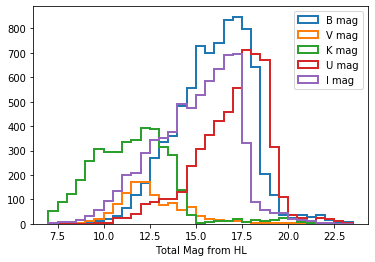

In [147]:
# histogram of magnitudes
plt.figure()
flag = (tab['bt'] != 0 ) & (tab['bt'] != tab['bt'])
print('fraction of sample with B mag = %.3f'%(sum(flag)/len(flag)))
flag = (tab['bt'] != 0 ) #& (tab['bt'] != tab['bt'])

flag2 = (tab['vt'] != 0) & (tab['vt'] != tab['vt'])
print('fraction of sample with V mag = %.3f'%(sum(flag2)/len(flag2)))
flag2 = (tab['vt'] != 0) #& (tab['vt'] != tab['vt'])

flag3 = (tab['kt'] != 0) & (tab['kt'] != tab['kt'])
print('fraction of sample with K mag = %.3f'%(sum(flag3)/len(flag3)))
flag3 = (tab['kt'] != 0) #& (tab['kt'] != tab['kt'])
mybins = np.arange(7,24,.5)
t1=plt.hist(tab['bt'][flag],bins=mybins,histtype='step',label='B mag',lw=2)
t2=plt.hist(tab['vt'][flag2],bins=mybins,histtype='step',label='V mag',lw=2)
t3=plt.hist(tab['kt'][flag3],bins=mybins,histtype='step',label='K mag',lw=2)
t4=plt.hist(tab['ut'][tab['ut'] != 0],bins=mybins,histtype='step',label='U mag',lw=2)
t5=plt.hist(tab['it'][tab['it'] != 0],bins=mybins,histtype='step',label='I mag',lw=2)
plt.xlabel('Total Mag from HL')
plt.legend()
all_t = [t1,t2,t3,t4,t5]
for t in all_t: 
    print('%i, %.3f'%(sum(t[0]),sum(t[0])/len(flag)))
plt.savefig('magnitude-histogram-HL.pdf')

In [60]:
len(flag)

9248

# Completeness with HL Magnitudes #

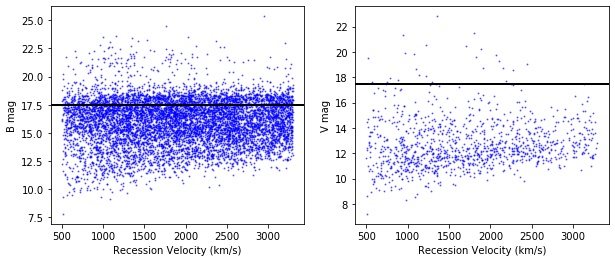

In [40]:
# histogram of magnitudes
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
flag = tab['bt'] != 0
plt.plot(tab['v'][flag],tab['bt'][flag],'bo',markersize=1,alpha=.5)
plt.xlabel('Recession Velocity (km/s)')
plt.ylabel('B mag')
plt.axhline(y=17.5,c='k',lw=2)
plt.subplot(1,2,2)
flag = tab['vt'] != 0
plt.plot(tab['v'][flag],tab['vt'][flag],'bo',markersize=1,alpha=.5)
plt.xlabel('Recession Velocity (km/s)')
plt.ylabel('V mag')
plt.axhline(y=17.5,c='k',lw=2)

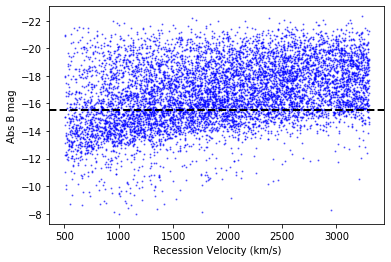

In [73]:
# histogram of magnitudes
plt.figure() #figsize=(10,4))
#plt.subplot(1,2,1)
flag = tab['mabs'] != 0
plt.plot(tab['v'][flag],tab['mabs'][flag],'bo',markersize=1,alpha=.5)
plt.xlabel('Recession Velocity (km/s)')
plt.ylabel('Abs B mag')
plt.axhline(y=-15.5,c='k',ls='--',lw=2)
plt.gca().invert_yaxis()

# Color - Magnitude Diagram Using HL magnitudes #

(-1, 3)

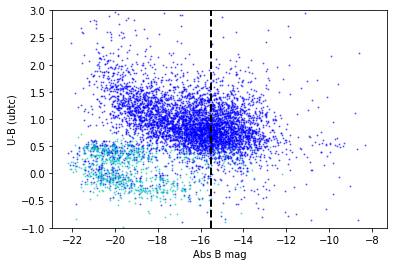

In [83]:
# color magnitude diagram


plt.figure() #figsize=(10,4))
#plt.subplot(1,2,1)
y = tab['ut'] - tab['bt']
flag = (tab['mabs'] != 0) & (tab['ut']!= 0) & (tab['bt']!= 0)
plt.plot(tab['mabs'][flag],y[flag],'bo',markersize=1,alpha=.5)
plt.plot(tab['mabs'][flag],tab['ubtc'][flag],'co',markersize=1,alpha=.5)
plt.ylabel('U-B (ubtc)')
plt.xlabel('Abs B mag')
plt.axvline(x=-15.5,c='k',ls='--',lw=2)
#plt.gca().invert_yaxis()
plt.ylim(-1,3)

# Positions of Galaxies, Color coded by recession velocity #

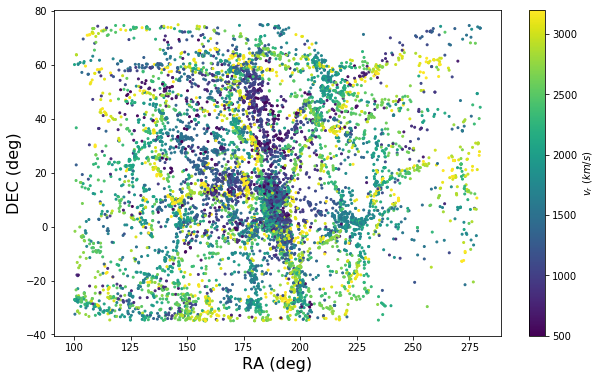

In [135]:
plt.figure(figsize=(10,6))
ra = tab['RA-COMBINED']
dec = tab['DEC-COMBINED']
vel = tab['HL-AGC-NSA-VEL']
plt.scatter(ra,dec,c=vel,vmin=500,vmax=3200,s=4)
plt.colorbar(label='$v_r \ (km/s)$')
plt.xlabel('RA (deg)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.savefig('positions-vr.pdf')

# NSA Color-Magnitude Diagram #

self.NUVr=self.s.ABSMAG[:,1] - self.s.ABSMAG[:,4]

number with NSA data =  5614


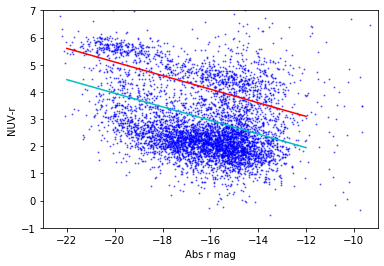

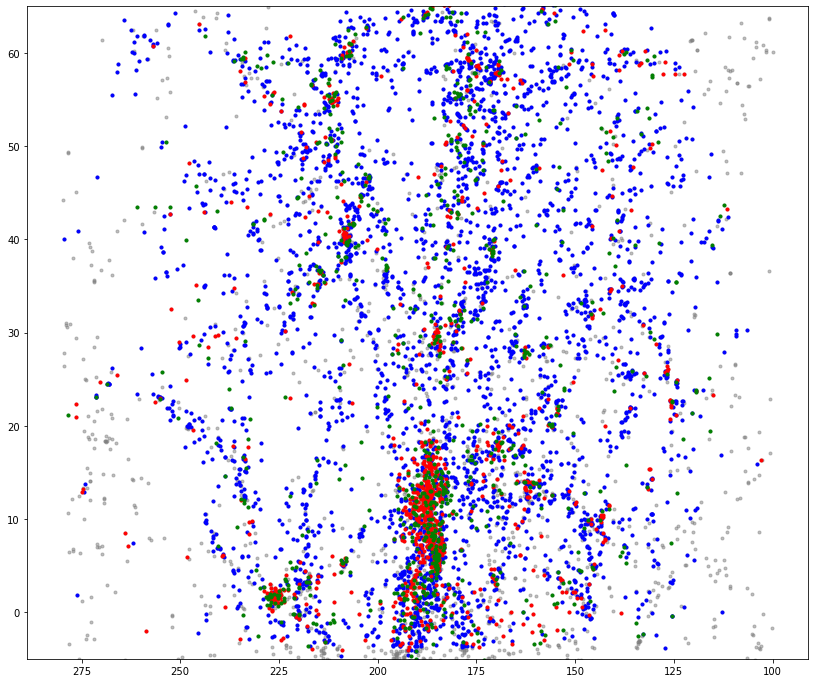

In [124]:
plt.figure() #figsize=(14,12))
#plt.subplot(1,2,1)
NUVr = tab['SERSIC_ABSMAG'][:,1]  -tab['SERSIC_ABSMAG'][:,4]
x = tab['SERSIC_ABSMAG'][:,4]
flag = tab['NSAflag'] 
plt.plot(x[flag],NUVr[flag],'bo',markersize=1,alpha=.5)
plt.ylabel('NUV-r')
plt.xlabel('Abs r mag')
#plt.axvline(x=-15.5,c='k',ls='--',lw=2)
#plt.gca().invert_yaxis()
plt.ylim(-1,7)
plt.xlim(-23,-9)
print('number with NSA data = ',sum(flag))
xl = np.linspace(-22,-12,100)
yred = -.25*(xl+20)+5.1
plt.plot(xl,yl,'r-')
yblue = yred-1.15
plt.plot(xl,yblue,'c-')
redflag = NUVr > (-.25*(x+20) +5.1)
greenflag = (NUVr < (-.25*(x+20) +5.1)) & (NUVr > (-.25*(x+20) +5.1-1.15))
blueflag = (NUVr < (-.25*(x+20) +5.1-1.15))
plt.savefig('NUVr-Mr.pdf')

flags = [redflag,greenflag,blueflag]
for f in flags: 
    f = f &tab['NSAflag']
plt.figure(figsize=(14,12))
ra=tab['RA-COMBINED']
dec = tab['DEC-COMBINED']
plt.plot(ra,dec,'k.',color='.5',alpha=.5)
plt.plot(ra[blueflag & flag],dec[blueflag& flag],'b.')
plt.plot(ra[redflag & flag],dec[redflag & flag],'r.')
plt.plot(ra[greenflag & flag],dec[greenflag& flag],'g.')
plt.ylim(-5,65)
plt.gca().invert_xaxis()


<Figure size 432x288 with 0 Axes>

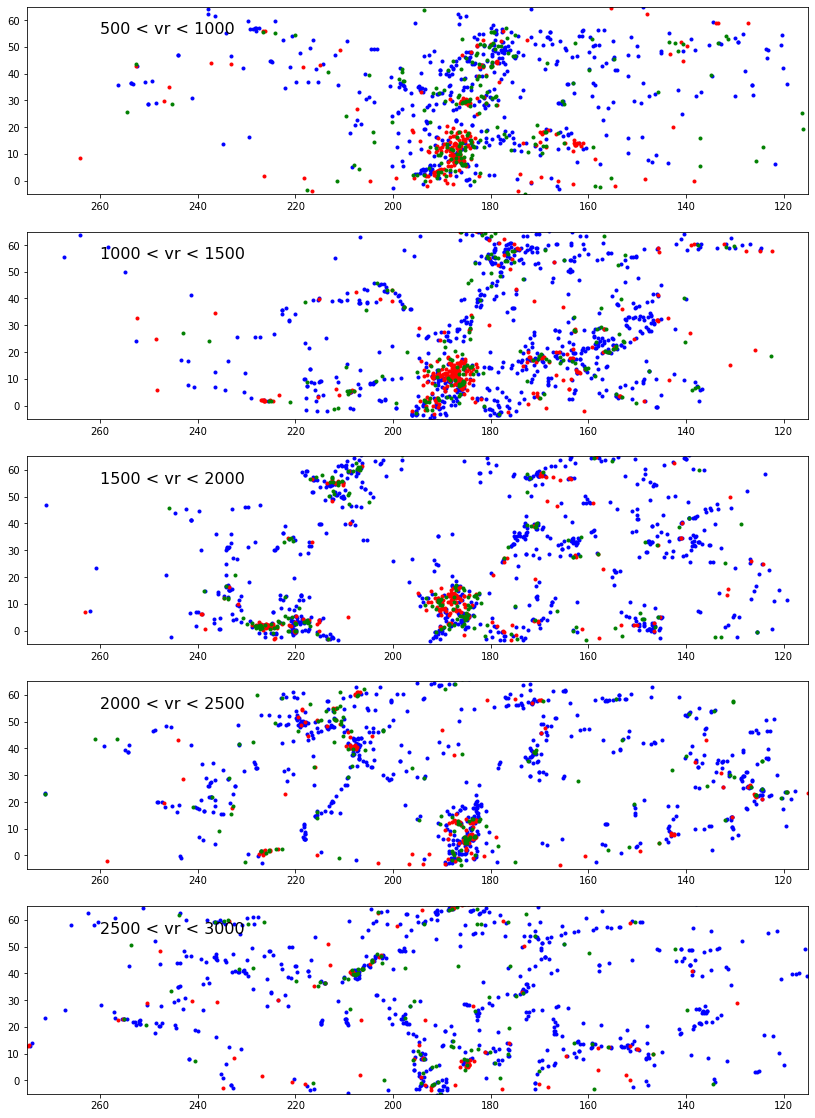

In [123]:
# velocity slices
plt.figure() #figsize=(14,12))
#plt.subplot(1,2,1)
NUVr = tab['SERSIC_ABSMAG'][:,1]  -tab['SERSIC_ABSMAG'][:,4]
x = tab['SERSIC_ABSMAG'][:,4]
flag = tab['NSAflag'] 
redflag = NUVr > (-.25*(x+20) +5.1)
greenflag = (NUVr < (-.25*(x+20) +5.1)) & (NUVr > (-.25*(x+20) +5.1-1.15))
blueflag = (NUVr < (-.25*(x+20) +5.1-1.15))

delta_v = 500
vmin=np.arange(500,3000,delta_v)
vmax = vmin + delta_v
nrows = len(vmin)
ra=tab['RA-COMBINED']
dec = tab['DEC-COMBINED']

vel = tab['Z']*3.e5
plt.figure(figsize=(14,20))

for i in range(len(vmin)):
    plt.subplot(nrows,1,i+1)
    vflag = (vel < vmax[i]) & (vel > vmin[i])
    plotflag = flag & vflag
        
    #plt.plot(ra,dec,'k.',color='.5',alpha=.5)
    plt.plot(ra[blueflag & plotflag],dec[blueflag& plotflag],'b.')
    plt.plot(ra[redflag & plotflag],dec[redflag & plotflag],'r.')
    plt.plot(ra[greenflag & plotflag],dec[greenflag& plotflag],'g.')
    plt.axis([115,275,-5,65])
    plt.gca().invert_xaxis()
    s = '%i < vr < %i'%(vmin[i],vmax[i])
    plt.text(260,55,str(s),fontsize=16)
plt.savefig('filament-color-vel-slice.pdf')

In [ ]:
# histogram of magnitudes
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
flag = tab['bt'] != 0
plt.plot(tab['v'][flag],tab['bt'][flag],'bo',markersize=1,alpha=.5)
plt.xlabel('Recession Velocity (km/s)')
plt.ylabel('B mag')
plt.axhline(y=17.5,c='k',lw=2)
plt.subplot(1,2,2)
flag = tab['vt'] != 0
plt.plot(tab['v'][flag],tab['vt'][flag],'bo',markersize=1,alpha=.5)
plt.xlabel('Recession Velocity (km/s)')
plt.ylabel('V mag')
plt.axhline(y=17.5,c='k',lw=2)

# Leroy+ Data#

Stellar mass and SFRs

In [145]:
#Plot SF Main Sequence

os.chdir('/home/rfinn/research/Virgo/supersample/')
c = fits.getdata('z0MGS_tbl.fits')
c = Table(c)

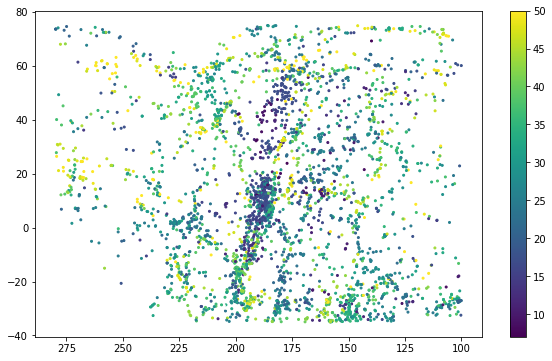

In [146]:
# plot positions of matched sources
v2 = int(3500./70)
v1 = int(500./70)
plt.figure(figsize=(10,6))
plt.scatter(c['ra_01'],c['dec_01'],c=c['dist_mpc'],vmin=v1,vmax=v2,s=4)
plt.gca().invert_xaxis()
plt.colorbar()

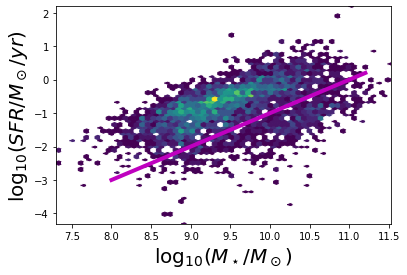

In [144]:
plt.figure()
cm = plt.cm.viridis
cm.set_under((1,1,1))
plt.hexbin(c['logmass'],c['logsfr'],gridsize=60,vmin=1,cmap=cm)#cmap='viridis')
#colormass(c['logmass'],c['logsfr'])
plt.xlabel('$\log_{10}(M_\star /M_\odot)$',fontsize=20)
plt.ylabel('$\log_{10}(SFR/M_\odot/yr)$',fontsize=20)
ssfr_limit = -11
xl = np.linspace(8,11.2,100)
plt.plot(xl,xl-11,'m-',lw=4)
plt.savefig('sfr-mstar.pdf')

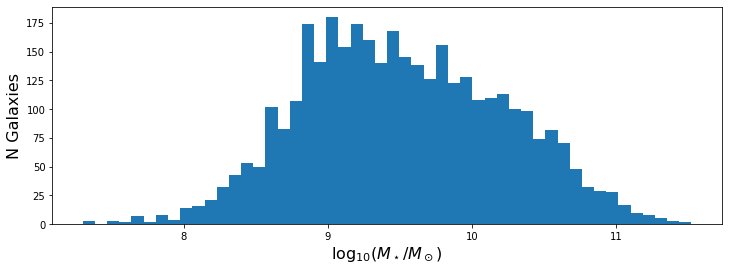

In [142]:
plt.figure(figsize=(12,4))
#flag =  (c['has_wise1'] == '1) & ((c['has_nuv'] == '1') |(c['has_wise4'] == '1'))
#mybins = np.arange(0,350,50)
t =plt.hist(c['logmass'],bins=50)#,bins=mybins)
plt.xlabel('$\log_{10}(M_\star/M_\odot)$',fontsize=16)
plt.ylabel('N Galaxies',fontsize=16)
#plt.xticks(np.arange(0,350,50))
plt.savefig('mstar-hist.pdf')


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


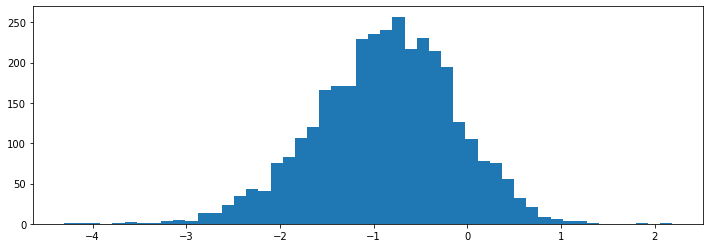

In [143]:
plt.figure(figsize=(12,4))
#flag =  (c['has_wise1'] == '1) & ((c['has_nuv'] == '1') |(c['has_wise4'] == '1'))
#mybins = np.arange(0,350,50)
t =plt.hist(c['logsfr'],bins=50)#,bins=mybins)
#plt.xticks(np.arange(0,350,50))


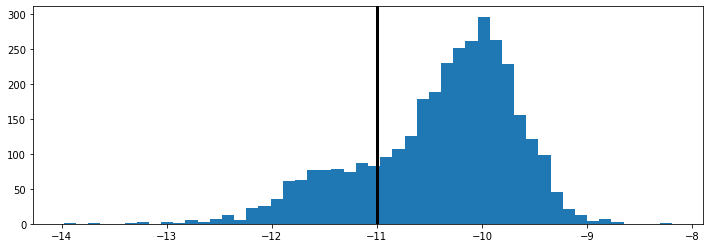

In [141]:
plt.figure(figsize=(12,4))
ssfr = c['logsfr'] - c['logmass']
t =plt.hist(ssfr,bins=50)#,bins=mybins)
plt.axvline(x=-11,c='k',lw=3)
